# Recopilación de datos meteorológicos para carreras de Fórmula 1

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
start = time.time()

In [3]:
import pandas as pd
import numpy as np
from selenium import webdriver
import time

In [6]:
races = pd.read_csv('./data/races.csv')

In [7]:
races.head()

,season,round,circuit_id,lat,long,country,date,url
0,1950,1,silverstone,52.0786,-1.01694,UK,1950-05-13,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,2,monaco,43.7347,7.42056,Monaco,1950-05-21,http://en.wikipedia.org/wiki/1950_Monaco_Grand...
2,1950,3,indianapolis,39.7950,-86.23470,USA,1950-05-30,http://en.wikipedia.org/wiki/1950_Indianapolis...
3,1950,4,bremgarten,46.9589,7.40194,Switzerland,1950-06-04,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
4,1950,5,spa,50.4372,5.97139,Belgium,1950-06-18,http://en.wikipedia.org/wiki/1950_Belgian_Gran...


In [8]:
races.shape

(1018, 8)

## Análisis de datos meteorológicos

In [9]:
weather_info = pd.read_csv('./data/weather.csv')

In [10]:
weather_info.shape

(1018, 9)

In [11]:
weather_info.head()

,season,round,circuit_id,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1950,1,silverstone,"Sunny, mild, dry.",0,0,0,0,0
1,1950,2,monaco,not found,0,0,0,0,0
2,1950,3,indianapolis,Rainy,0,0,0,1,0
3,1950,4,bremgarten,"Warm, dry and sunny",1,0,1,0,0
4,1950,5,spa,"Warm, dry and sunny",1,0,1,0,0


In [12]:
weather_info.tail()

,season,round,circuit_id,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
1013,2019,17,suzuka,Sunny,1,0,0,0,0
1014,2019,18,rodriguez,Partly cloudy,0,0,0,0,1
1015,2019,19,americas,Sunny,1,0,0,0,0
1016,2019,20,interlagos,Sunny,1,0,0,0,0
1017,2019,21,yas_marina,Clear,1,0,0,0,0


## Distribuciones de cada atributo

También podemos observar la distribución de cada atributo discretizando los valores en buckets y revisar la frecuencia en cada bucket como histogramas.

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'round'}>,
        <AxesSubplot:title={'center':'weather_warm'}>],
       [<AxesSubplot:title={'center':'weather_cold'}>,
        <AxesSubplot:title={'center':'weather_dry'}>,
        <AxesSubplot:title={'center':'weather_wet'}>],
       [<AxesSubplot:title={'center':'weather_cloudy'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

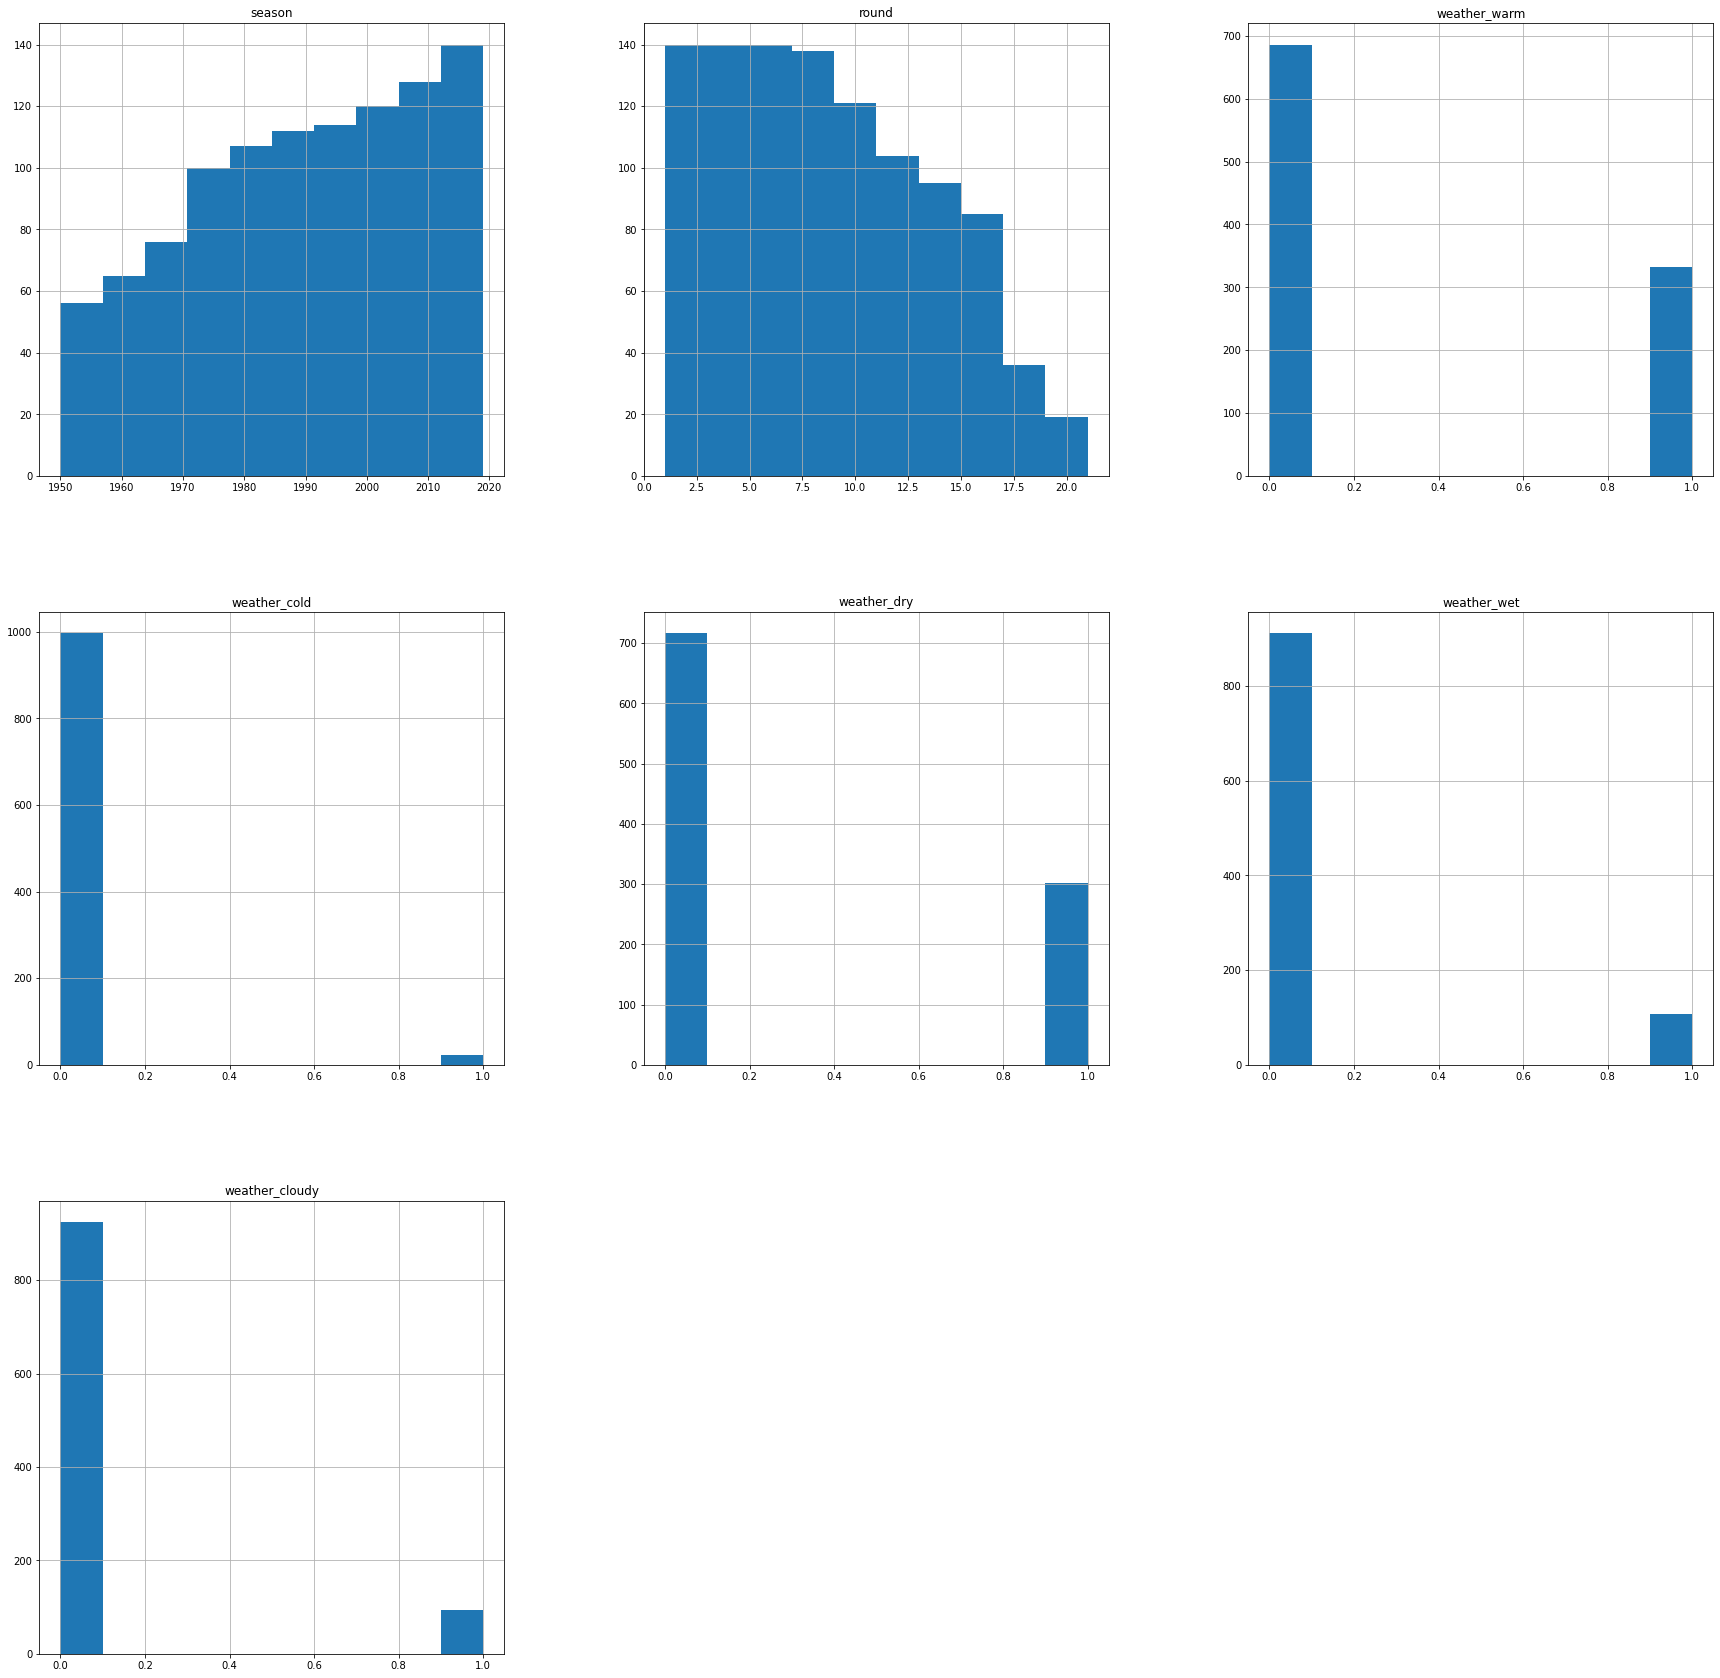

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,30))
ax = fig.gca()
weather_info.hist(ax = ax)

## Relaciones variable-variable

array([[<AxesSubplot:xlabel='season', ylabel='season'>,
        <AxesSubplot:xlabel='round', ylabel='season'>,
        <AxesSubplot:xlabel='weather_warm', ylabel='season'>,
        <AxesSubplot:xlabel='weather_cold', ylabel='season'>,
        <AxesSubplot:xlabel='weather_dry', ylabel='season'>,
        <AxesSubplot:xlabel='weather_wet', ylabel='season'>,
        <AxesSubplot:xlabel='weather_cloudy', ylabel='season'>],
       [<AxesSubplot:xlabel='season', ylabel='round'>,
        <AxesSubplot:xlabel='round', ylabel='round'>,
        <AxesSubplot:xlabel='weather_warm', ylabel='round'>,
        <AxesSubplot:xlabel='weather_cold', ylabel='round'>,
        <AxesSubplot:xlabel='weather_dry', ylabel='round'>,
        <AxesSubplot:xlabel='weather_wet', ylabel='round'>,
        <AxesSubplot:xlabel='weather_cloudy', ylabel='round'>],
       [<AxesSubplot:xlabel='season', ylabel='weather_warm'>,
        <AxesSubplot:xlabel='round', ylabel='weather_warm'>,
        <AxesSubplot:xlabel='weather_war

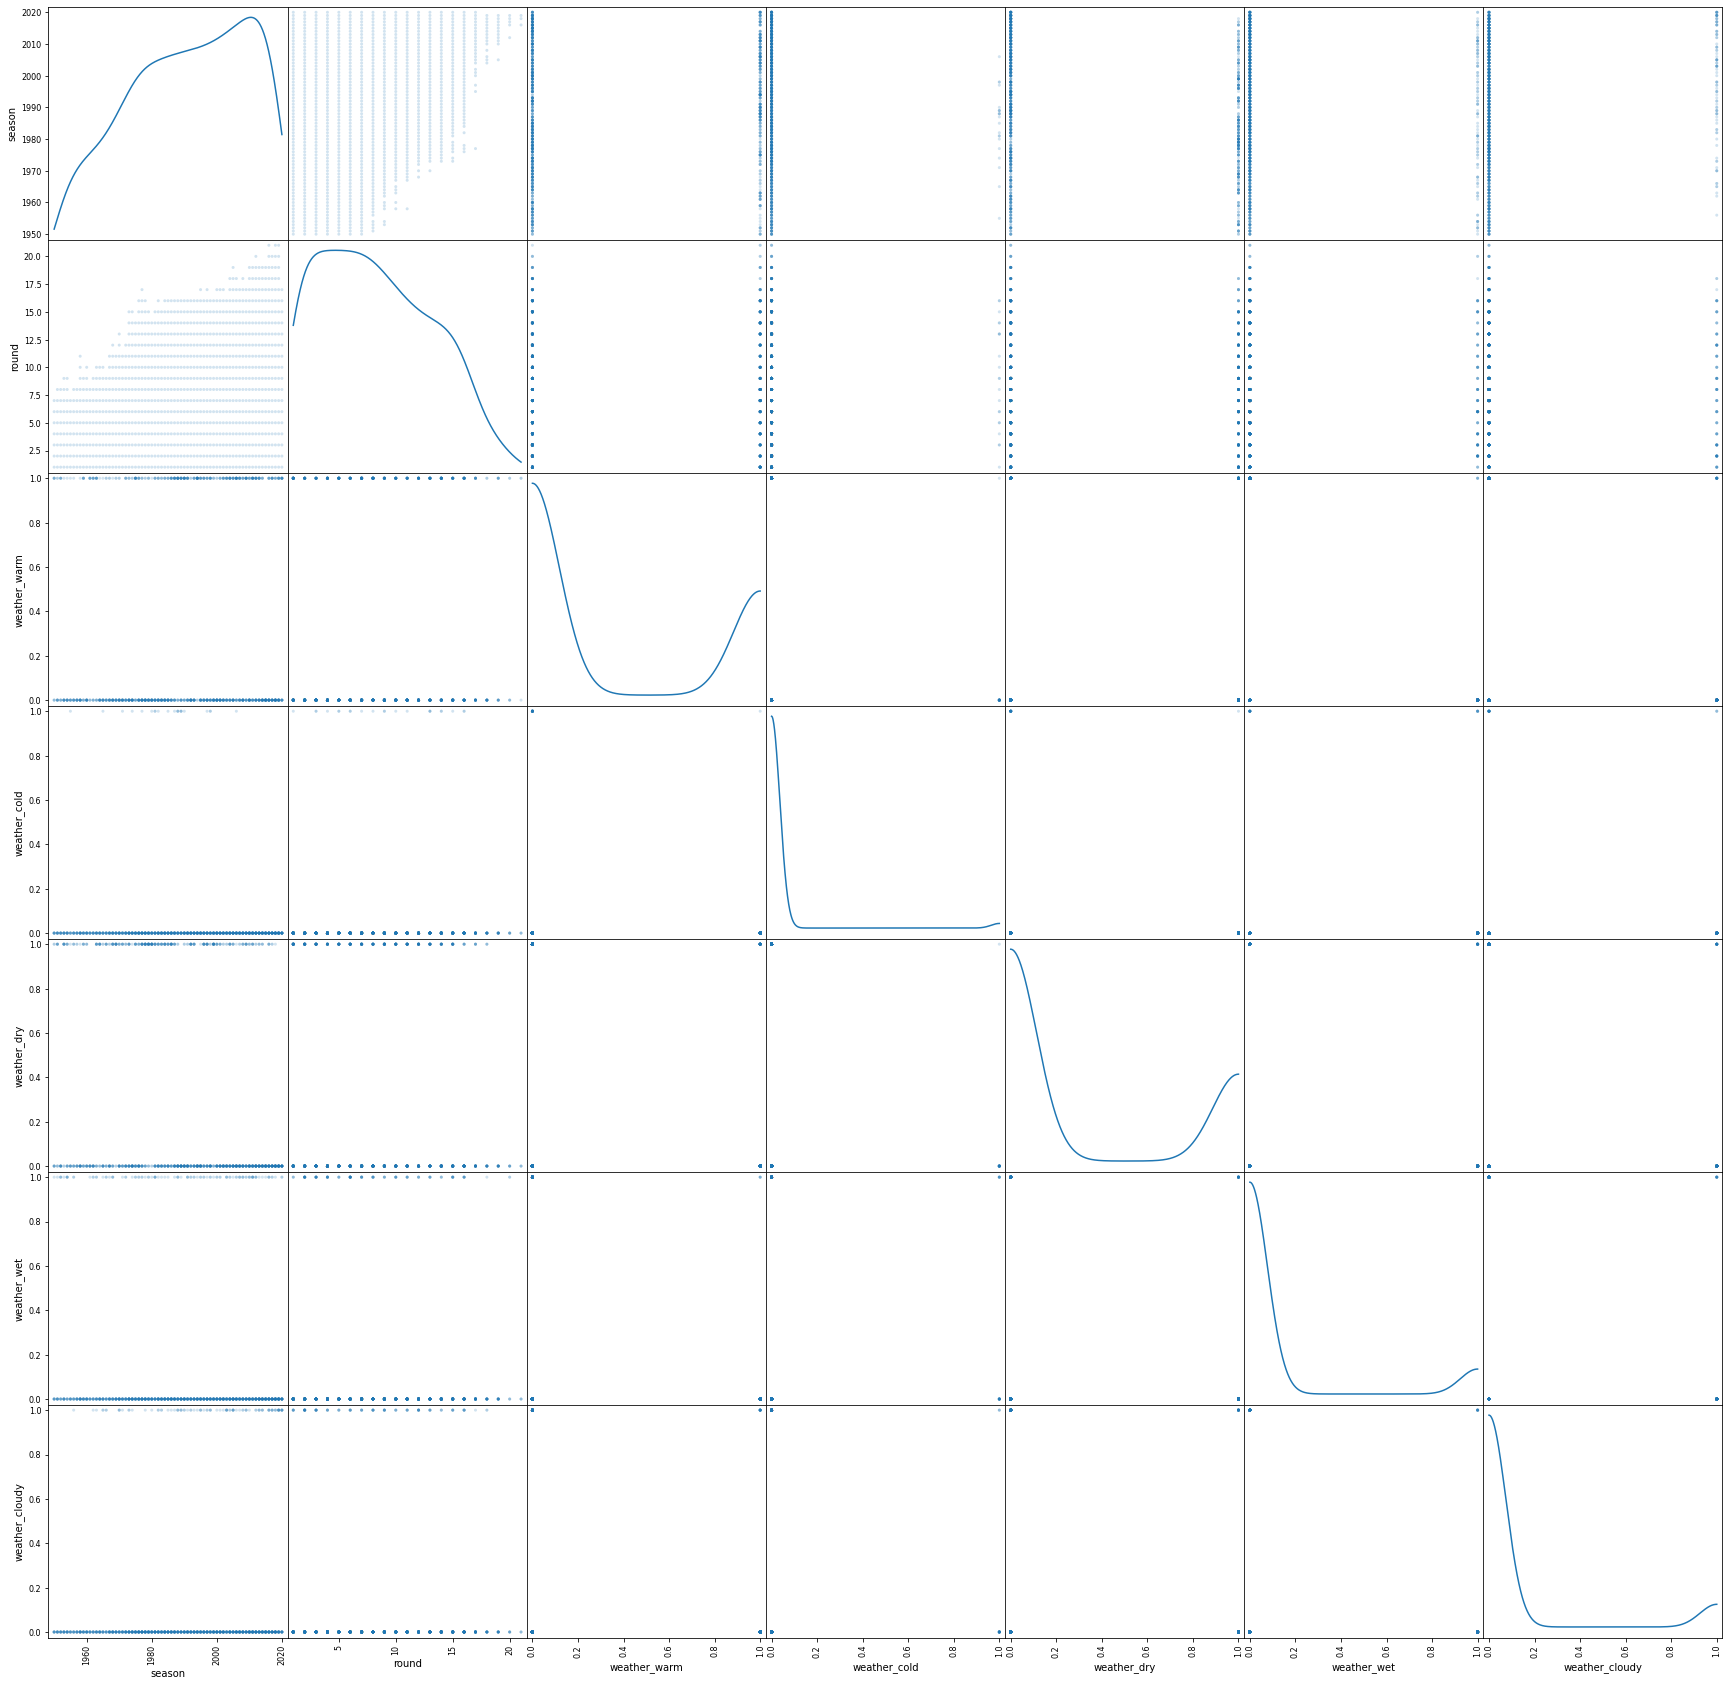

In [53]:
from pandas.plotting import scatter_matrix
scatter_matrix(weather_info, alpha=0.2, figsize=(30, 30), diagonal='kde')

A partir de este gráfico, podemos ver que tenemos variables numéricas x7 como columnas. La diagonal muestra la distribución de las siete variables numéricas de nuestro dataframe. Estamos usando la gráfica de densidad en la diagonal.

In [54]:
end = time.time()

In [55]:
import datetime
str(datetime.timedelta(seconds=(end - start)))

'0:00:17.624803'

In [56]:
print(str(end - start)+" seconds")

17.624802827835083 seconds
